### Copyright @ Md. Shakil Sikder Shawon 2019
#### Department of Statistics, BSMRSTU

#### @Binary Data Lab 
##### 1st Workshop's solution

## Problem Description

The data of this exercise were gathered as part of a study to estimate the population size of the bowhead whale (Raftery and Zeh 1993). The statistical procedures for estimating the population size along with an assessment of the variability of the estimate were quite involved, and this problem deals with only one aspect of the problem - a study of the distributino of whale swimming speeds.

Pairs of sightings and corresponding locations that could be reliably attributed to the same whale were collected, thus providing an estimate of velocity for each whale. The velocities, v1, v2, ..., v210 (km/h), were converted into times t1, t2, ..., t210 to swim 1 km-t(i) = 1/v(i). The distribution of the ti was then fit by a gamma distribution. The times are contained in the file whales.
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

### a. Make a hitogram of the 210 values of ti. Does it appear that a gamma distrubition would be a plausible model to fit?

### b. Fit the parameters of the gamma distribution by the method of moments.

### c. Fit the parameters of the gamma distribution by maximum likelihood. How do these values compare to those found before?

### d. Plot the two gamma densities on top of the histogram. Do the fits look reasonable?

### e. Estimate the sampling distributions and the standard errors of the parameters fit by the method of moments by using the bootstrap.

### f. Estimate the sampling distributions and the standard errors of the parameters fit by maximum likelihood by using the bootsrap. How do they compare to the results found previously?



####    --------------------------------------------------------------------------------------------------------------------------------------------------

## Solution 
### (a) Make a hitogram of the 210 values of ti. Does it appear that a gamma distrubition would be a plausible model to fit?

#### Setting working directory

In [87]:
getwd()

[1] "/Users/san/Desktop/R/workshop"

In [88]:
setwd('/Users/san/Desktop/R/workshop/')

In [89]:
getwd()

[1] "/Users/san/Desktop/R/workshop"

#### Loading Data

In [90]:
data = read.table('whales.txt')

In [91]:
head(data)

V1
0.2252
0.7194
0.1642
0.2398
0.1880
0.2123


In [92]:
y = data$V1
y

[1] 0.2252 0.7194 0.1642 0.2398 0.1880 0.2123 0.1337 0.3401 0.4762 0.2028
 [11] 0.7407 0.3571 0.3968 0.6803 0.4049 0.2169 1.7241 2.6316 0.2710 0.3571
 [21] 0.2825 0.4587 2.8571 1.3699 0.3731 1.4925 0.5988 0.4167 3.2258 0.7246
 [31] 1.1494 1.0101 0.5405 0.4237 0.3367 2.2727 0.5128 0.3584 0.4464 0.5882
 [41] 0.4367 0.5556 0.7463 0.4032 1.8182 0.3165 0.4049 0.2786 0.6667 0.6369
 [51] 0.3460 0.5076 0.3584 0.6369 0.3559 0.3021 0.3311 0.3086 1.0638 0.3155
 [61] 1.7241 0.2273 1.3158 0.4525 2.2222 0.5181 0.2141 0.9346 0.9434 0.3802
 [71] 0.5882 0.5208 0.7519 0.3448 1.7857 1.5152 0.4386 0.3484 0.2865 2.5641
 [81] 0.3448 0.4566 1.4286 0.3145 0.2079 0.2342 0.2016 0.1451 0.3086 0.3636
 [91] 0.3984 1.7857 1.1494 0.2525 0.3497 0.6410 0.4132 0.2179 0.2538 0.3012
[101] 1.0870 1.0204 0.3436 0.4717 0.3003 0.3289 0.2915 0.3731 0.7407 0.8696
[111] 2.0408 0.4505 3.7037 0.3268 0.4292 0.3623 0.2016 1.1364 0.2119 1.4925
[121] 0.2551 0.3003 0.2252 0.8696 0.1718 0.2959 0.2347 0.3268 0.3497 0.2364
[131] 0.3623 0.1776 0.2203 0.2222 0.3106 0.1475 0.2899 0.2096 0.1466 0.2404
[141] 0.2273 0.3367 0.2188 0.1912 0.5405 0.3636 0.2494 0.3448 0.2128 0.2907
[151] 0.4219 4.0000 0.2890 0.1984 0.3311 0.2571 0.3106 0.2179 0.3344 0.5917
[161] 0.2415 1.2987 1.2658 0.2421 0.2353 1.1494 0.1724 0.2778 0.1686 0.2020
[171] 1.1905 0.2053 0.2146 0.3636 0.2320 0.2959 0.4630 0.3521 0.4065 0.2841
[181] 0.3817 0.3497 0.3021 0.3268 0.2151 0.3690 2.5000 1.5625 4.3478 0.1337
[191] 0.1667 0.7576 0.2525 0.1675 0.2538 0.1812 0.1828 0.3058 0.3185 0.6135
[201] 0.2283 0.3802 0.4587 0.4785 0.3460 0.4065 0.5618 0.4274 0.3279 0.2370

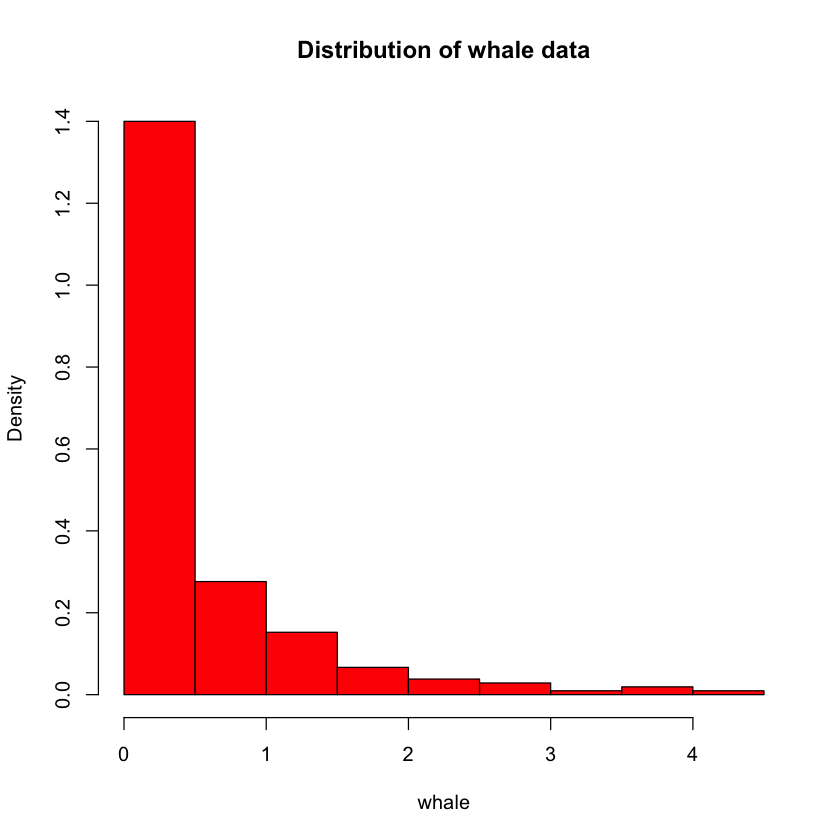

In [93]:
hist(y,main='Distribution of whale data',xlab='whale',probability = T,col='red',border = "black")

In [100]:
gamma = rgamma(210, shape=mean(y)/var(y), rate=mean(y)^2/var(y))


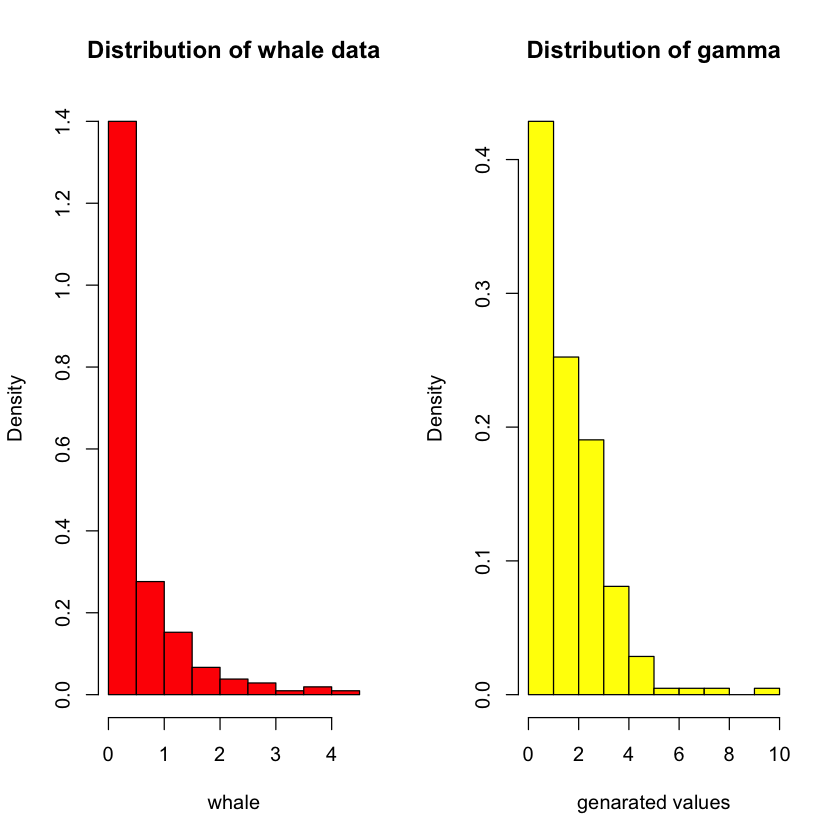

In [101]:
par(mfrow=c(1,2))
hist(y,main='Distribution of whale data',xlab='whale',probability = T,col='red',border = "black")
hist(gamma,main='Distribution of gamma',xlab='genarated values',probability = T,col='yellow',border = "black") 

## Comments:
Yes, Histogram is look like gammma distribution.


### (b) Fit the parameters of the gamma distribution by the method of moments.

### Estimating gamma Parameters by Method Of Moments 

In [114]:
n=length(y)         # sample size     
X.bar=mean(y)        #Sample Mean
sigma.sq = var(y)   #variance
alpha = X.bar/sigma.sq
beta = (X.bar)^2/sigma.sq
alpha
beta

[1] 1.312491

[1] 0.7953685

### (c) Fit the parameters of the gamma distribution by maximum likelihood. How do these values compare to those found before?

### Fit the parameters of the gamma distribution by maximum likelihood

![](mle1.png)

In [115]:
negative_loglikelihood = function(theta,data)
  {
    a = theta[1]; b = theta[2]
    n = length(data); sumd = sum(data)
    sumlogd = sum(log(data))
    negative_loglikelihood = n*lgamma(a) + b*sumd -n*a*log(b)-(a-1)*sumlogd
    negative_loglikelihood
} 

In [116]:
gammasearch = optim(fn=negative_loglikelihood,par=c(1.13,0.79),data=y)

In [117]:
gammasearch$par

[1] 1.595574 2.632904

### (d) Plot the two gamma densities on top of the histogram. Do the fits look reasonable?

In [118]:
mom.alpha = alpha #alpha of Method of Moments
mom.beta = beta   #beta of Method of Moments


mle.alpha = 1.5955738735393       #alpha of MLE
mle.beta = 2.63290434482722       #beta of MLE

In [119]:
x = seq(0,5,0.01)

In [120]:
#R function dgamma(x, rate) is the probability of interval x until the αth 
##successful event when successful events occur with rate 

mom.gamma = dgamma(x,mom.alpha,mom.beta)
mle.gamma = dgamma(x,mle.alpha,mle.beta)


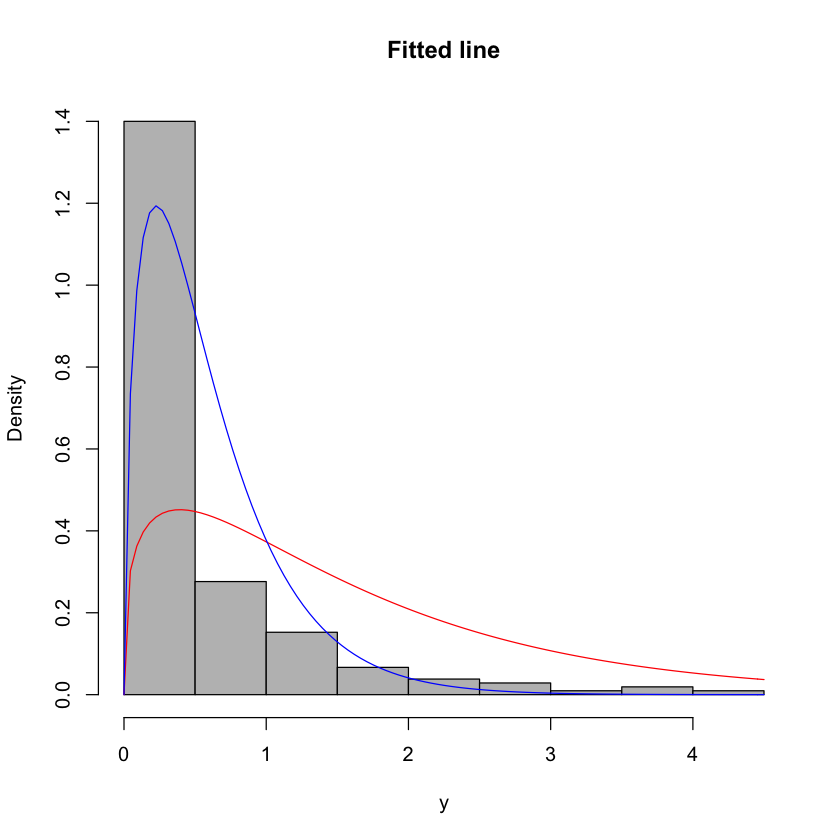

In [123]:
hist(y, prob = T,main='Fitted line',col='gray')
curve(dgamma(x,mom.alpha,mom.beta), add=T,col='red') #Red fitted line refers Method of moments
curve(dgamma(x,mle.alpha,mle.beta), add=T,col='blue') #Blue fitted line refers Maximum likelihood Estimate


## Comments

#### Maximum Likelihood Estimate fits well

### (e) Estimate the sampling distributions and the standard errors of the parameters fit by the method of moments by using the bootstrap.

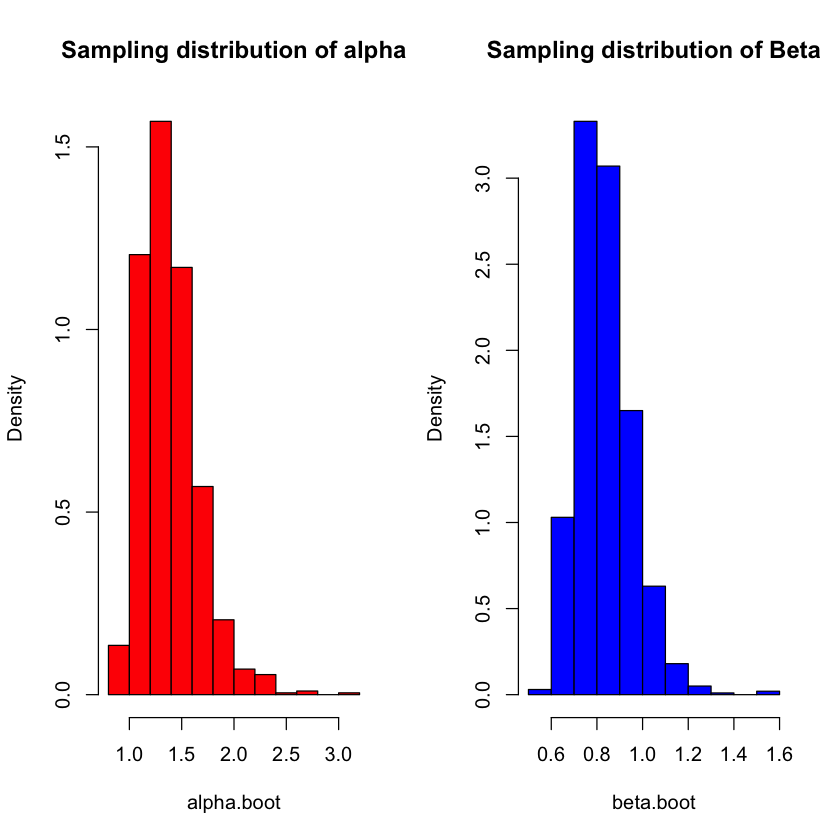

In [124]:
B = 1000

y = matrix(0,B,210) #creating null matrix


alpha.boot = numeric(B)  #creating null vector
beta.boot = numeric(B)

#Bootstraping

for(i in 1:B){
    y[i,] = sample(data$V1,210,replace=T)
    x.bar = mean(y[i,])
    sigmasq.hat = var(y[i,]) 
    ## Method of moments estimates of alpha and beta
    alpha.boot[i] = x.bar/sigmasq.hat
    beta.boot[i] = x.bar^2/sigmasq.hat
}


par(mfrow=c(1,2))
hist(alpha.boot,probability = T,plot=T,col="red",main= 'Sampling distribution of alpha')
hist(beta.boot,probability = T,plot=T,col="blue",main= 'Sampling distribution of Beta')


#### Sampling distribution of alpha

In [125]:
mean.alpha = mean(alpha.boot); sd.alpha = sd(alpha.boot)
mean.alpha; sd.alpha

[1] 1.387278

[1] 0.2728362

In [126]:
CI <-c(mean.alpha-1.96*sd.alpha,mean.alpha +1.96*sd.alpha)
CI

[1] 0.8525194 1.9220371

#### Sampling distribution of beta

In [54]:
mean.beta = mean(beta.boot); sd.beta = sd(beta.boot)
mean.beta; sd.beta

[1] 0.8324721

[1] 0.1201566

In [55]:
CI <-c(mean.beta-1.96*sd.beta,mean.beta +1.96*sd.beta)
CI

[1] 0.5969651 1.0679791

## (f)  Estimate the sampling distributions and the standard errors of the parameters fit by maximum likelihood by using the bootsrap. How do they compare to the results found previously?

In [79]:
options(warn=-1)

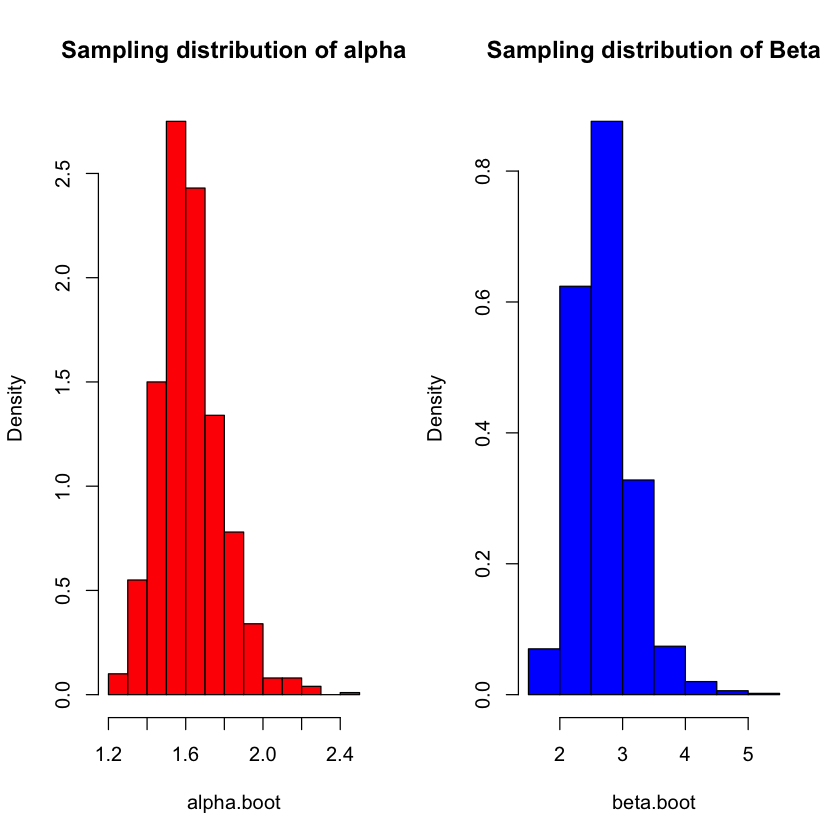

In [81]:
library(MASS)
alphahatMLEsim <- numeric(1000)
lambdahatMLEsim <- numeric(1000)
y = matrix(0,1000,210)


for (i in 1:1000) {
    y[i,] <- sample(data$V1,210,replace=T)
## fitting gamma distribution by MLE by using MASS library's fitdistr function
    estsMLE <- fitdistr(y[i,],"gamma")$estimate
    alpha.boot[i] <- estsMLE["shape"]
    beta.boot[i] <- estsMLE["rate"]
}

par(mfrow=c(1,2))
hist(alpha.boot,probability = T,plot=T,col="red",main= 'Sampling distribution of alpha')
hist(beta.boot,probability = T,plot=T,col="blue",main= 'Sampling distribution of Beta')

#### Sampling distribution of alpha

In [82]:
mean.alpha = mean(alpha.boot); sd.alpha = sd(alpha.boot)
mean.alpha; sd.alpha

[1] 1.620248

[1] 0.1640616

In [83]:
CI <-c(mean.alpha-1.96*sd.alpha,mean.alpha +1.96*sd.alpha)
CI

[1] 1.298688 1.941809

#### Sampling distribution of beta

In [84]:
mean.beta = mean(beta.boot); sd.beta = sd(beta.boot)
mean.beta; sd.beta

[1] 2.701174

[1] 0.4660384

In [85]:
CI <-c(mean.beta-1.96*sd.beta,mean.beta +1.96*sd.beta)
CI

[1] 1.787739 3.614609